# Q2: PCA and Fisher's Linear Discriminant

In [1]:
from load_mnist import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
train_X, train_Y, test_X, test_Y = mnist()
train_images = train_X.reshape((1000,28,28))
train_X.shape

(1000, 784)

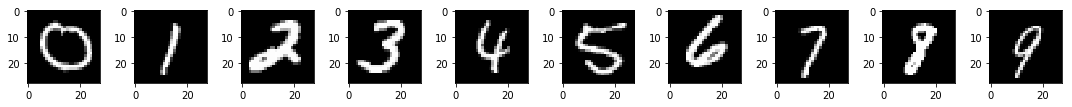

In [3]:
random.seed(1)
plt.clf()
f = plt.figure(figsize=(15,20))
columns = 10
rows = 1
im_indices = []
for i in range(1,rows*columns+1):
    plt.subplot(rows,columns,i)
    ix = int(random.random()*100) + 100*int(i-1)
    im_indices.append(ix)
    plt.imshow(train_images[ix],cmap='gray')
plt.tight_layout()
plt.show()

# Mean

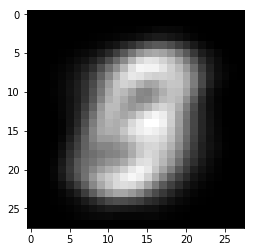

In [4]:
mean = np.mean(train_X,axis=0)
mean_image = mean.reshape((28,28))
plt.clf()
plt.imshow(mean_image, cmap='gray')
plt.show()

# Covariance Matrix

In [5]:
centered_data = (train_X - mean)
print(centered_data.shape)
cov = np.cov(centered_data.T)
cov.shape

(1000, 784)


(784, 784)

# PCA using SVD
When we run SVD on covariance matrix we get the eigen vectors and the eigen values.

In [6]:
U,S,Vt = np.linalg.svd(cov)
# S is the eigen values
# U is eigen vectors

In [7]:
k = 100 #top features

k_eigen_vectors = U[:,:k]

k_eigen_values = S[:k]

In [8]:
print("Variance Preserved:" + str(sum(k_eigen_values)/sum(S)) + "%")

Variance Preserved:0.9283837890018389%


# Reduced dimensional data

In [9]:
n_data = k_eigen_vectors.T.dot(centered_data.T).T
print(n_data.T.shape)
pca_cov = np.cov(n_data.T)

(100, 1000)


# Reconstruction after PCA

In [10]:
reconstructed = n_data.dot(k_eigen_vectors.T)
reconstructed_images = reconstructed.reshape((1000,28,28))

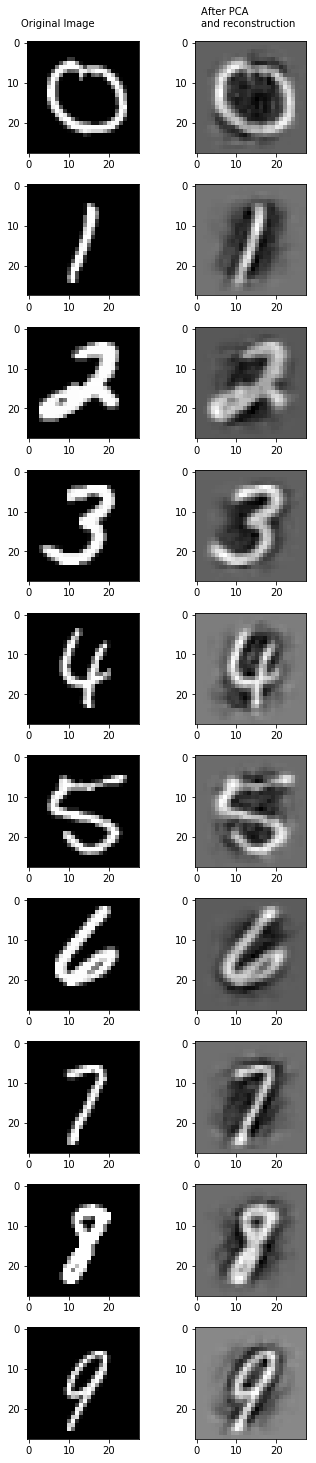

In [11]:
f = plt.figure(figsize=(5,20))
columns = 2
rows = 10
ix = 0
for i in range(1,rows*columns+1,2):
    plt.subplot(rows,columns,i)
    plt.imshow(train_images[im_indices[ix]], cmap='gray')
    plt.subplot(rows,columns,i+1)
    plt.imshow(reconstructed_images[im_indices[ix]],cmap='gray')
    ix+=1
plt.tight_layout()
plt.figtext(0.1,1,"Original Image")
plt.figtext(0.6,1,"After PCA \nand reconstruction")
plt.show()

# Covariance before and after PCA

BEFORE:


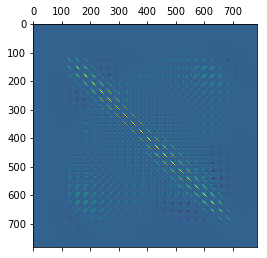

AFTER:


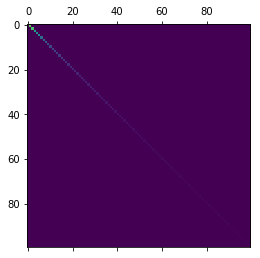

In [12]:
print("BEFORE:")
x=plt.matshow(cov)
x=plt.show()

print("AFTER:")
x=plt.matshow(pca_cov)
x=plt.show()

# PCA Whitening

In [13]:
0 in k_eigen_values
k_eigen_vectors.shape

(784, 100)

In [14]:
eigen_diag = np.diag(k_eigen_values**-0.5)
white_vectors = eigen_diag.dot(k_eigen_vectors.T).T
whitened_data = white_vectors.T.dot(centered_data.T).T
cov_white = np.cov(whitened_data.T)
white_reconstructed_data = whitened_data.dot(white_vectors.T)
cov_recon_white = np.cov(white_reconstructed_data.T)
print(whitened_data.shape)
white_recon_images = white_reconstructed_data.reshape((1000,28,28))

(1000, 100)


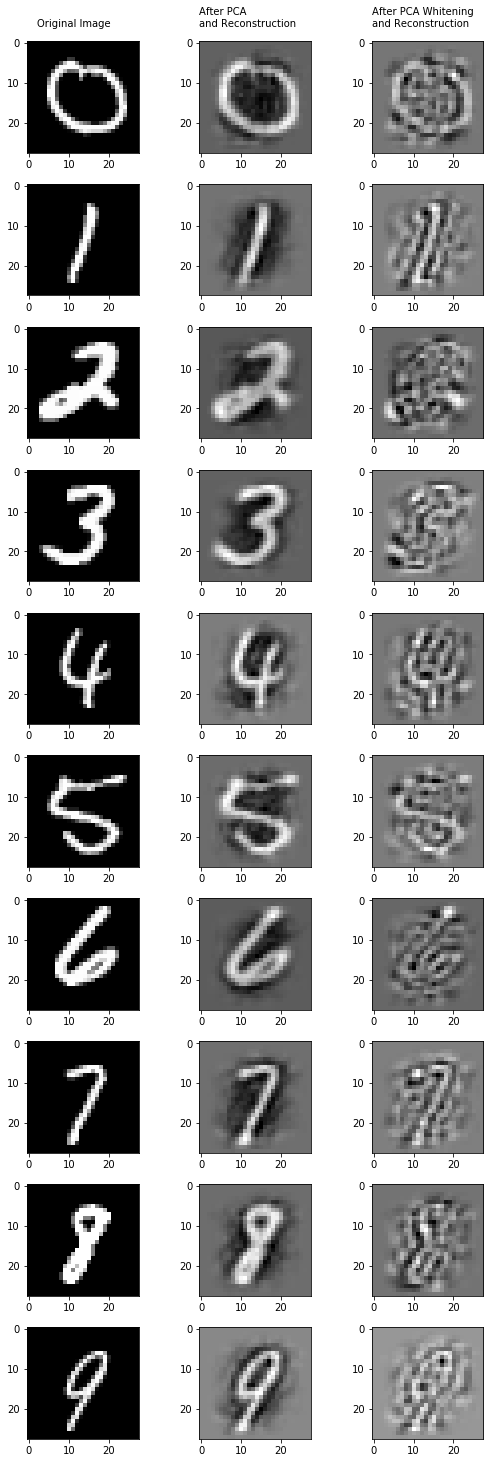

In [15]:
f = plt.figure(figsize=(7.5,20))
columns = 3
rows = 10
ix = 0
for i in range(1,rows*columns+1,3):
    plt.subplot(rows,columns,i)
    plt.imshow(train_images[im_indices[ix]], cmap='gray')
    plt.subplot(rows,columns,i+1)
    plt.imshow(reconstructed_images[im_indices[ix]],cmap='gray')
    plt.subplot(rows,columns,i+2)
    plt.imshow(white_recon_images[im_indices[ix]],cmap='gray')
    ix+=1
plt.tight_layout()
plt.figtext(0.1,1,"Original Image")
plt.figtext(0.4,1,"After PCA \nand Reconstruction")
plt.figtext(0.72,1,"After PCA Whitening \nand Reconstruction")
plt.show()

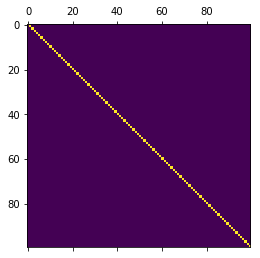

In [16]:
x=plt.matshow(cov_white)
x=plt.show()

# ZCA Whitening

In [17]:
zca_white_vector = k_eigen_vectors.dot(np.diag(k_eigen_values**-0.5)).dot(k_eigen_vectors.T)
zca_data = zca_white_vector.dot(centered_data.T).T
zca_cov = np.cov(zca_data)
print(zca_data.shape)

(1000, 784)


In [18]:
cov_white = np.cov(zca_data.T)
zca_recon_images = zca_data.reshape((1000,28,28))

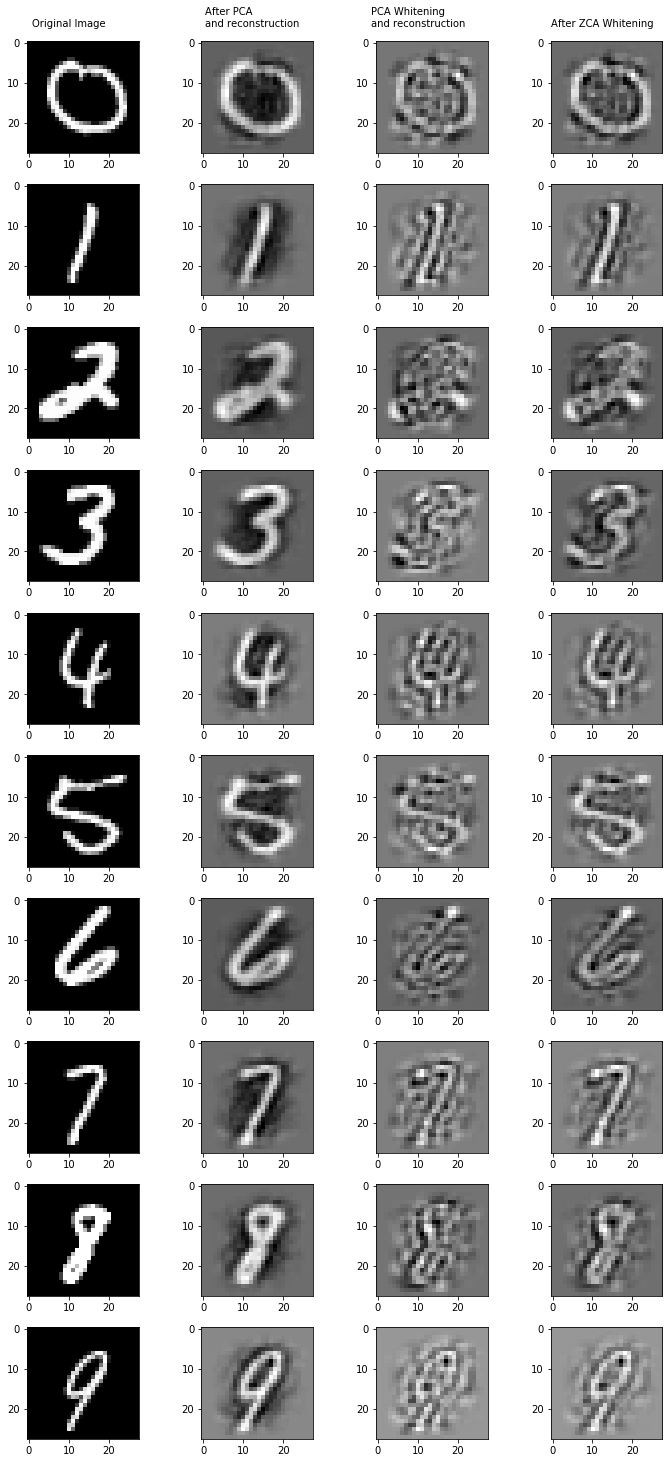

In [19]:
f = plt.figure(figsize=(10,20))
columns = 4
rows = 10
ix = 0
for i in range(1,rows*columns+1,4):
    plt.subplot(rows,columns,i)
    plt.imshow(train_images[im_indices[ix]], cmap='gray')
    plt.subplot(rows,columns,i+1)
    plt.imshow(reconstructed_images[im_indices[ix]],cmap='gray')
    plt.subplot(rows,columns,i+2)
    plt.imshow(white_recon_images[im_indices[ix]],cmap='gray')
    plt.subplot(rows,columns,i+3)
    plt.imshow(zca_recon_images[im_indices[ix]],cmap='gray')
    ix+=1
plt.tight_layout()
plt.figtext(0.07,1,"Original Image")
plt.figtext(0.31,1,"After PCA \nand reconstruction")
plt.figtext(0.54,1,"PCA Whitening \nand reconstruction")
plt.figtext(0.79,1,"After ZCA Whitening")
plt.show()

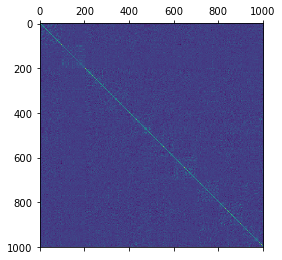

In [20]:
x=plt.matshow(zca_cov)
x=plt.show()

# Fisher's Linear Discriminant

In [21]:
#Post pca data is stored in n_data variable, each class has 100 training images
class1_data = k_eigen_vectors.T.dot(train_X[:100].T).T
class2_data = k_eigen_vectors.T.dot(train_X[100:200].T).T

In [22]:
#Sw = Sw1 + Sw2
#Swi = 1/n * Summation( (xk-mean)*(xk-mean).Transpose 
class1_mean = np.mean(class1_data, axis=0).reshape((100,1))
class2_mean = np.mean(class2_data, axis=0).reshape((100,1))

In [23]:
Sw1 = np.zeros((100,100))
for i in range(100):
    row = class1_data[i].reshape((100,1))
    c = (row - class1_mean)
    Sw1 += c.dot(c.T)
Sw1 = Sw1/100

Sw2 = np.zeros((100,100))
for i in range(100):
    row = class2_data[i].reshape((100,1))
    c = (row - class2_mean)
    Sw2 += c.dot(c.T)
Sw2 = Sw2/100

In [24]:
Sw = Sw1 + Sw2
Sw_inv = np.linalg.inv(Sw)

In [25]:
#Fisher's linear discriminant
W = Sw_inv.dot( class2_mean - class1_mean )

In [26]:
#Taking the components along the discriminant
#New class means
n_class1_mean = W.T.dot(class1_mean)[0][0]
n_class2_mean = W.T.dot(class2_mean)[0][0]

In [27]:
print(n_class1_mean)
print(n_class2_mean)

-75.47525850731593
102.72848440415646


In [28]:
def classifier(data_point):
    component = W.T.dot(data_point)
    #Assuming that points rarely ever lie exactly in between the means
    if abs(component - n_class1_mean) < abs(component - n_class2_mean):
        print(0,abs(component - n_class1_mean),abs(component - n_class2_mean))
        return 0
    else:
        print(1,abs(component - n_class1_mean),abs(component - n_class2_mean))
        return 1

In [29]:
def accuracy(data_points, actual_labels):
    t=0
    f=0
    for index in range(len(data_points)):
        if classifier(data_points[index]) == actual_labels[index]:
            t+=1
        else:
            f+=1
    return t/(t+f),t,f

In [30]:
#taking only 0 and 1 digits from test data
sort_indices = np.argsort(test_Y[0])
sorted_labels = test_Y[0][sort_indices]
labels = sorted_labels[:20]
sorted_test_data = test_X[sort_indices]
test_data = sorted_test_data[:20]

In [31]:
#Moving to center of training data
centered_test = test_data
postpca_test_data = k_eigen_vectors.T.dot(centered_test.T).T
print("Class,Distance From Mean1,Distance from Mean2")
acc,t,f = accuracy(postpca_test_data, labels)
print("Accuracy:",acc*100,"%")

Class,Distance From Mean1,Distance from Mean2
0 [59.53358578] [118.67015713]
0 [2.15512344] [176.04861947]
0 [55.12410005] [123.07964286]
0 [38.69924409] [139.50449882]
0 [7.70998235] [170.49376056]
0 [1.84891846] [176.35482445]
0 [29.19952927] [149.00421364]
0 [52.16218699] [126.04155592]
0 [54.30012861] [232.50387153]
0 [56.34180189] [234.5455448]
1 [202.95418809] [24.75044518]
1 [165.52204537] [12.68169755]
1 [182.32848328] [4.12474037]
1 [195.65384084] [17.45009793]
1 [216.03530112] [37.83155821]
1 [129.69459507] [48.50914784]
1 [111.77311509] [66.43062782]
1 [193.22025086] [15.01650795]
1 [156.02000154] [22.18374137]
1 [164.86061279] [13.34313012]
Accuracy: 100.0 %
